# LOGISTIC REGRESSION

### Imoprt necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import sklearn

## Step1 :- Data Exploration
Load the dataset and perform exploratory data analysis (EDA)

In [ ]:
Training_data = pd.read_csv("/content/Titanic_train.csv")
Testing_data = pd.read_csv("/content/Titanic_test.csv")

In [ ]:
Training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Training_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
Training_data['Name']=Training_data['Name'].astype('string')
Training_data['Sex']=Training_data['Sex'].astype('string')
Training_data['Cabin']=Training_data['Cabin'].astype('string')
Training_data['Embarked']=Training_data['Embarked'].astype('string')

In [ ]:
Training_data.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin          string[python]
Embarked       string[python]
dtype: object

In [ ]:
Training_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: Int64

<Axes: xlabel='Sex', ylabel='Count'>

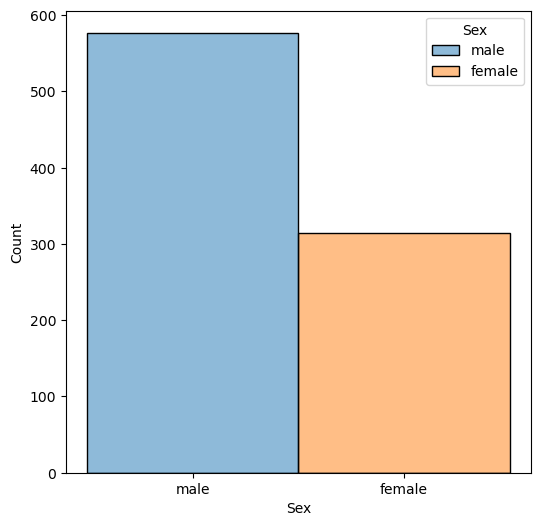

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(x='Sex',hue='Sex',data=Training_data)

In [ ]:
Training_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'How many passengers are survived , Survived = 1 and Unsurvived = 0')

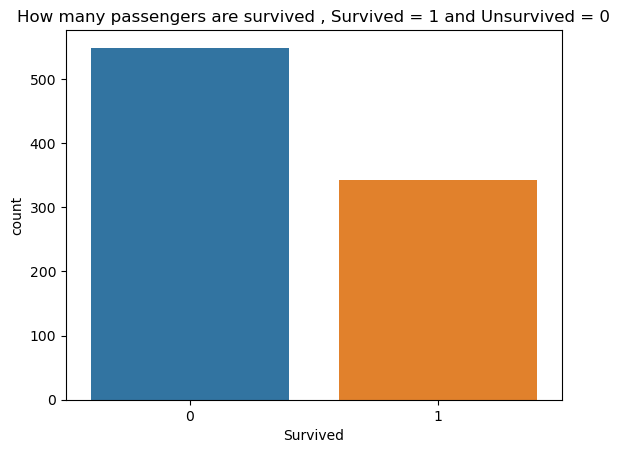

In [ ]:
sns.countplot(x='Survived',data=Training_data)
plt.title("How many passengers are survived , Survived = 1 and Unsurvived = 0")

<Axes: xlabel='Survived', ylabel='Sex'>

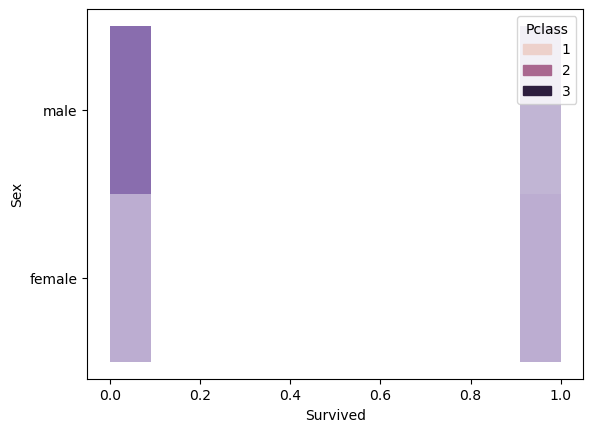

In [ ]:
sns.histplot(x='Survived',y='Sex',hue='Pclass',data=Training_data)

/var/folders/k4/gg24xjsd20g67g_m1x_sp3440000gn/T/ipykernel_4541/1108560477.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Age', y='Pclass', data=Training_data, cbar=True, palette='muted')


Text(0, 0.5, 'Passenger Class')

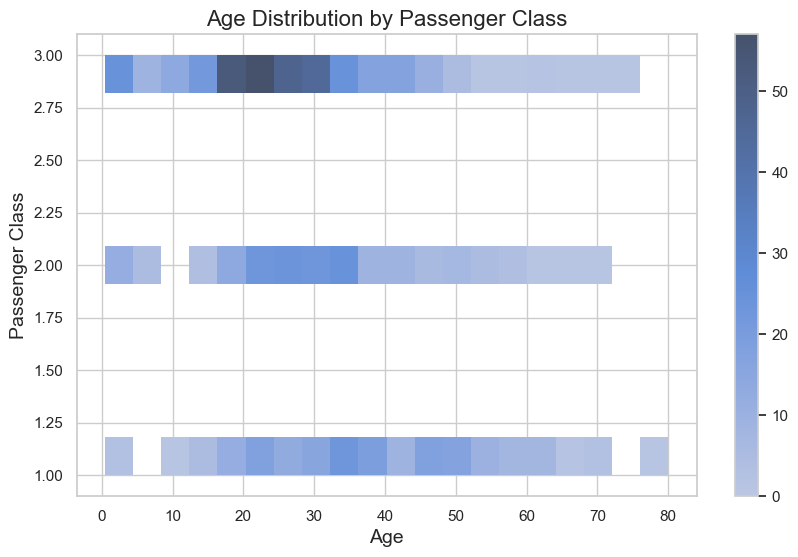

In [ ]:
#Set the aesthetic style of the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', y='Pclass', data=Training_data, cbar=True, palette='muted')
plt.title('Age Distribution by Passenger Class', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Passenger Class', fontsize=14)

In [ ]:
Training_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

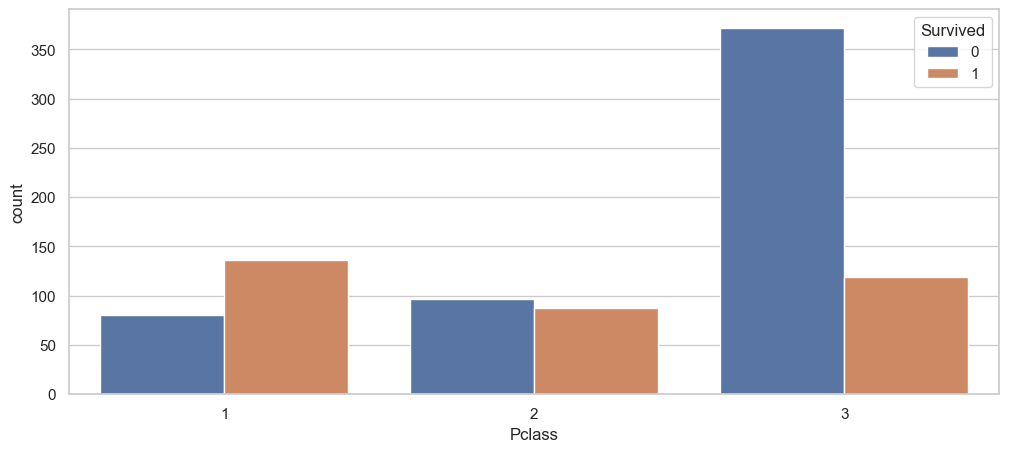

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Pclass',hue='Survived',data=Training_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

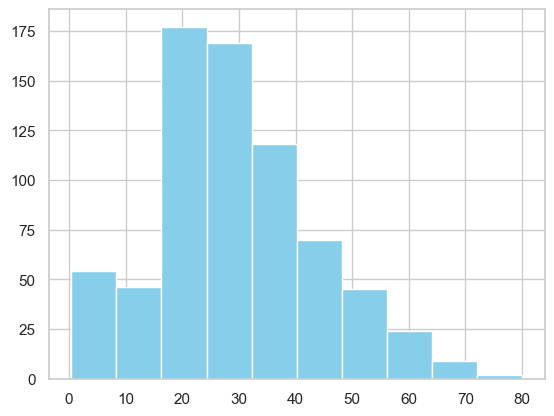

In [ ]:
plt.hist(Training_data['Age'],color='skyblue')

<Axes: ylabel='Count'>

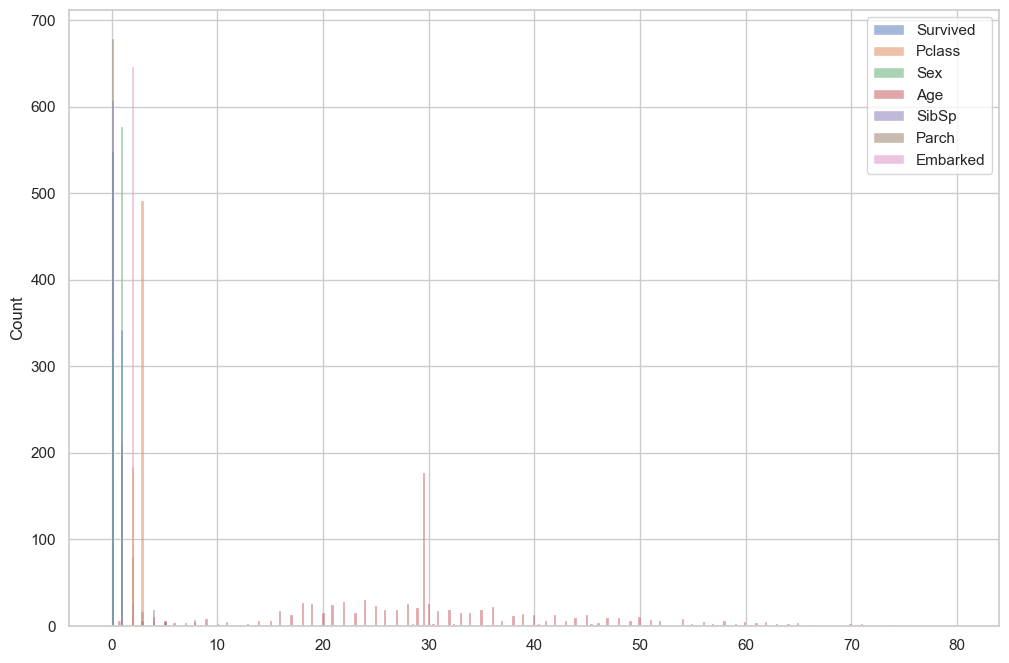

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=Training_data)

/Users/jagdishreddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


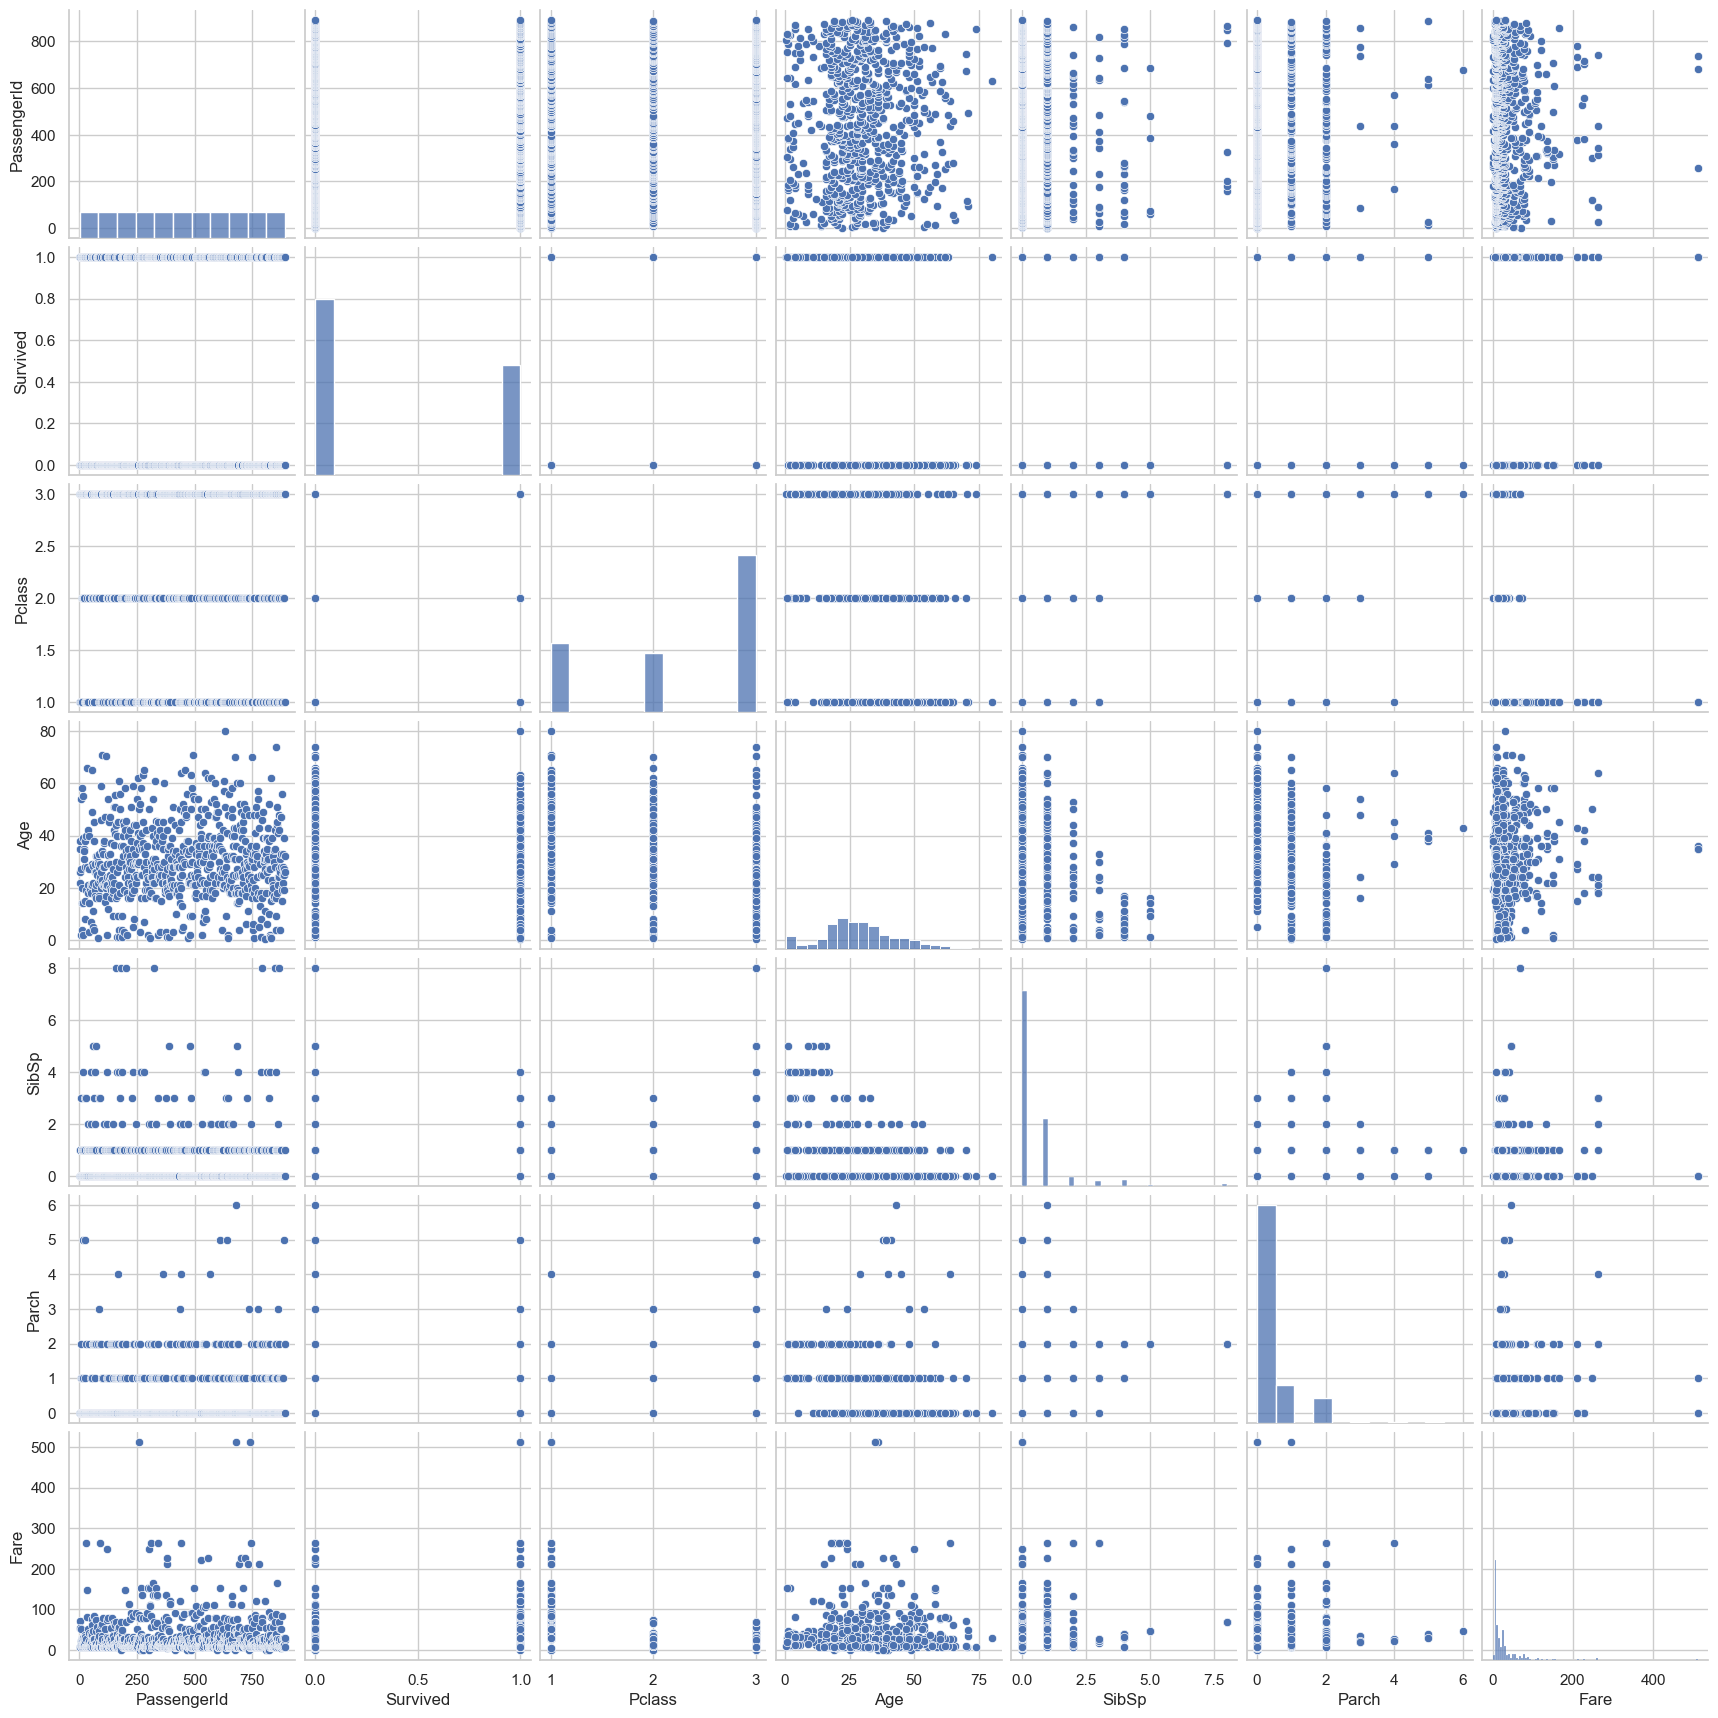

In [ ]:
sns.pairplot(data=Training_data)

## Step2 :- Data Preprocessing

Checking out the null values and finding missing values

In [ ]:
Training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


In [ ]:
Training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# More than 50% data is missing in the cabin so we can drop the column

Training_data = Training_data.drop(['Cabin'],axis=1)

In [ ]:
Training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
Mean = Training_data['Age'].mean()

In [ ]:
Mean

29.69911764705882

In [ ]:
Mode = Training_data['Embarked'].mode()

In [ ]:
Mode

0    S
Name: Embarked, dtype: string

In [ ]:
Training_data['Age'] = Training_data['Age'].fillna(Mean)
Training_data['Embarked'] = Training_data['Embarked'].fillna(Mode[0])

In [ ]:
Training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
Training_data.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Embarked       string[python]
dtype: object

In [ ]:
Training_data['Embarked'] = Training_data['Embarked'].astype('string')

In [ ]:
Training_data.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Embarked       string[python]
dtype: object

In [ ]:
Training_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Drop the columns which are unnecessary for our model
Training_data.drop(['PassengerId','Name','Ticket','Fare'],inplace=True,axis=1)

In [ ]:
Training_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

Encode categorical variables

In [ ]:
Training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Le = LabelEncoder()

In [ ]:
Training_data['Sex'] = Le.fit_transform(Training_data['Sex'])
Training_data['Embarked'] = Le.fit_transform(Training_data['Embarked'])

In [ ]:
Training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


## Step3 :- Model Building

In [ ]:
X = Training_data.iloc[:,1:]
y = Training_data.iloc[:,0]

In [ ]:
# Spliting the data into the traing data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 6)
(223, 6)
(668,)
(223,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lr_model = LogisticRegression()

Lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Accuracy of the Lr_model
Lr_model.score(x_train,y_train)

0.8053892215568862

In [ ]:
Lr_model.score(x_test,y_test)

0.7937219730941704

## Cross validate the model using Five means cv=5

In [ ]:
from sklearn.model_selection import cross_val_score

cross_value_score=cross_val_score(Lr_model,X,y ,cv=5)
print('Total cross_value_score',cross_value_score)
print('Max cross_vlaue_socre',cross_value_score.max())
print('Average vlaue of corss Value score',cross_value_score.mean())

Total cross_value_score [0.79329609 0.78089888 0.78651685 0.76404494 0.82022472]
Max cross_vlaue_socre 0.8202247191011236
Average vlaue of corss Value score 0.7889962965287804


## Model Evaluation :
Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [ ]:
y_pred = Lr_model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
pd.DataFrame({'predict_value':y_pred,'Actual_value':y_test})

,predict_value,Actual_value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix1 = confusion_matrix(y_test,y_pred)

In [ ]:
confusion_matrix1

array([[116,  23],
       [ 23,  61]])

In [ ]:
confusion_matrix1_Accuracy=accuracy_score(y_test,y_pred)
confusion_matrix1_Accuracy

0.7937219730941704

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.73      0.73      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
ROC_Score=roc_auc_score(y_test,y_pred)
ROC_Score

0.7803614251455979

Text(0, 0.5, 'True positve report')

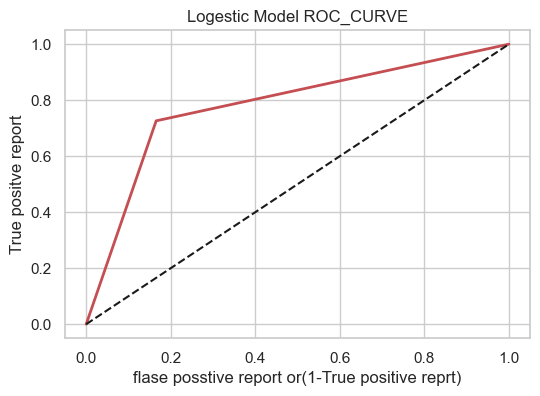

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2,color='r')
plt.title('Logestic Model ROC_CURVE')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('flase posstive report or(1-True positive reprt)')
plt.ylabel('True positve report')

In [ ]:
import pickle
filename = 'My_Lr_model.sav'
pickle.dump(Lr_model,open(filename,'wb'))

## Interpretation:

In [ ]:
Lr_model.coef_

array([[-1.0153487 , -2.59995565, -0.03867922, -0.33107003, -0.03153456,
        -0.23735828]])

## Testing My model using given Testing data

In [ ]:
Testing_data = Testing_data.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [ ]:
Testing_data=Testing_data.drop(['Survived'],axis=1)

In [ ]:
Testing_data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [ ]:
Testing_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [ ]:
Mean1=Testing_data['Age'].mean()
Mean1
Testing_data['Age'] = Testing_data['Age'].fillna(Mean1)

In [ ]:
Testing_data['Sex'] = Le.fit_transform(Testing_data['Sex'])
Testing_data['Embarked'] = Le.fit_transform(Testing_data['Embarked'])

In [ ]:
Testing_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
Testing_data.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object

In [ ]:
Testing_data

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


In [ ]:
y_pred = Lr_model.predict(Testing_data)

In [ ]:
Testing_data1 = pd.read_csv("/Users/jagdishreddy/Downloads/Logistic Regression/Titanic_train.csv")

In [ ]:
Actual = Testing_data1["Survived"].values

In [ ]:
pd.DataFrame({'acutal':Actual,'predicted':y_pred})

,acutal,predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,1


In [ ]:
Testing_data1 = Testing_data1.assign(Predicted_survived_value=y_pred)

In [ ]:
Testing_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_survived_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


# Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?

# precision
  it helps us to measure the ability to classify positive samples in the model. While calculating the Precision of a model, we should consider both Positive as well as        Negative samples that are classified.
  While calculating the Precision of a model, we should consider both Positive as well as        Negative samples that are classified.
  In Precision, we should consider all positive samples that are classified as positive either   correctly or incorrectly.
# Recall
   It helps us to measure how many positive samples were correctly classified by the ML model
   While calculating the Recall of a model, we only need all positive samples while all           negative samples will be neglected.
   Recall of a machine learning model is dependent on positive samples and independent of         negative samples.
   The recall cares about correctly classifying all positive samples. It does not consider if     any negative sample is classified as positive.

# What is cross-validation
Cross-validation is a method used to determine if a model is accurately interpreting and predicting data.
This method allows for training and testing different properties in a dataset and tuning model hyperparameters.
Cross-validation evaluates and compares learning algorithms by dividing a data set into two segments: one used to train the model and the other used to validate.
 A model is considered accurate if it can correctly adjust to the validation set
# and why is it important in binary classification?
the partitions are selected so that the mean response value is approximately equal in all the partitions.
In the case of binary classification, this means that each partition contains roughly the same proportions of the two types of class labels.